In [372]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


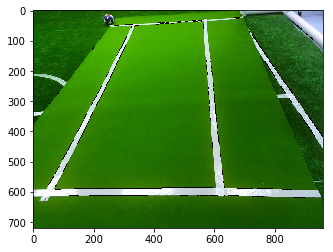

In [444]:
lines = cv2.HoughLinesP(new, rho, theta, threshold)
for j in range(lines.shape[0]):
    for x1, y1, x2, y2 in lines[j]:
        cv2.line(img, (x1,y1), (x2,y2), (0,0,0), 2)
plt.imshow(img)

In [558]:
def diff_neighb_1(_):
    tmp = []
    for i in range(len(_) - 1):
        tmp.append(_[i+1][0] - _[i][0])
    return tmp


def diff_neighb_2(_):
    tmp = []
    for i in range(len(_) - 1):
        tmp.append(_[i+1][1] - _[i][1])
    return tmp


def split_lines(coef, mode=1, eps = 20):
    '''
    @input =list
    @output = list of lists
    '''
    if mode == 1:
        coef.sort(key=lambda tup: tup[0])
        diff = diff_neighb_1(coef)
        #eps = max(coef, key=lambda tup: tup[0])[0] / acc

    elif mode == 2:
        coef.sort(key=lambda tup: tup[1])
        diff = diff_neighb_2(coef)
        #eps = max(coef, key=lambda tup: tup[1])[1] / acc
        
    i = 0
    tmp = []
    for el in diff:
        if el > eps:
            tmp.append(i)
        i+=1
    res = []
    prev = 0
    tmp.append(len(coef))
    for el in tmp:
        if (el-prev) < 2:
            continue
        res.append(coef[prev:el])
        prev = el + 1
    res
    return res


def mean_lines(splited_coef):
    res = []
    for el in splited_coef:
        tmp1, tmp2 = [], []
        for _ in el:
            tmp1.append(_[0])
            tmp2.append(_[1])
        res.append((np.mean(tmp1), np.mean(tmp2)))
    return res

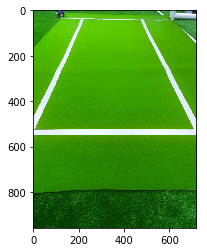

In [582]:
img = cv2.imread('test/4.jpg')

plt.imshow(img)

In [569]:
gray = cv2.imread('test/4.jpg', 0)

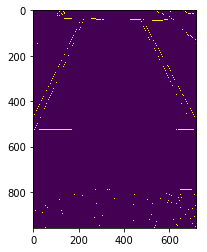

In [570]:
new = cv2.Canny(gray, 250, 270)
plt.imshow(new)

In [571]:
rho =1 # distance resolution in pixels of the Hough grid
theta = 1 * np.pi/180 # angular resolution in radians of the Hough grid
threshold = 100	 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 500 #minimum number of pixels making up a line
max_line_gap = 20

In [563]:
lines = cv2.HoughLinesP(new, rho, theta, threshold)

In [564]:
coef = []
for j in range(lines.shape[0]):
    for x1, y1, x2, y2 in lines[j]:
        if y1 == y2:
            a = 0
        elif x1 == x2:
            continue
        else:
            a = (y1-y2)/(x1 - x2)
        b = y1 - a*x1 
        coef.append((a,b))

In [565]:
splited = split_lines(coef, eps=0.5)
for el in splited:
    s_l = split_lines(el, mode=2, eps=50)
    for a, b in mean_lines(s_l):
        print(a,b)
        if (a != a) or (np.abs(a) == 1):
            continue
        pt1 = (0, int(b))
        if a == 0:
            pt2 = (720, int(b))
        else:
            pt2 = (720, int(720*a + b))
        cv2.line(img, pt1, pt2, (0,0,0), 2)

-2.435908289241622 553.3143268665491
0.0 38.857142857142854
0.0 188.0
0.0 364.5
0.0 542.2857142857143
1.943405312298593 -882.1859047847191
1.5833333333333335 -697.0833333333334
0.9282051282051281 -371.04615384615386


In [566]:
cv2.imwrite('houghlines_test2.jpg',img)

True

In [385]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import sys
%matplotlib inline 

filename = sys.argv[1]


rho =1 # distance resolution in pixels of the Hough grid
theta = 1 * np.pi/180 # angular resolution in radians of the Hough grid
threshold = 100	 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 500 #minimum number of pixels making up a line
max_line_gap = 20


def diff_neighb_1(_):
    tmp = []
    for i in range(len(_) - 1):
        tmp.append(_[i+1][0] - _[i][0])
    return tmp


def diff_neighb_2(_):
    tmp = []
    for i in range(len(_) - 1):
        tmp.append(_[i+1][1] - _[i][1])
    return tmp


def split_lines(coef, mode=1, acc = 20):
    '''
    @input =list
    @output = list of lists
    '''
    if mode == 1:
        coef.sort(key=lambda tup: tup[0])
        diff = diff_neighb_1(coef)
        eps = max(coef, key=lambda tup: tup[0])[0] / acc

    elif mode == 2:
        coef.sort(key=lambda tup: tup[1])
        diff = diff_neighb_2(coef)
        eps = max(coef, key=lambda tup: tup[1])[1] / acc
        
    i = 0
    tmp = []
    for el in diff:
        if el > eps:
            tmp.append(i)
        i+=1
    res = []
    prev = 0
    tmp.append(len(coef))
    for el in tmp:
        res.append(coef[prev:el])
        prev = el + 1
    res
    return res


def mean_lines(splited_coef):
    res = []
    for el in splited_coef:
        tmp1, tmp2 = [], []
        for _ in el:
            tmp1.append(_[0])
            tmp2.append(_[1])
        res.append((np.mean(tmp1), np.mean(tmp2)))
    return res

img = cv2.imread('test/'+filename)
gray = cv2.imread('test/'+filename, 0)

new = cv2.Canny(gray, 40, 180)
lines = cv2.HoughLinesP(new, rho, theta, threshold)

coef = []
for j in range(lines.shape[0]):
    for x1, y1, x2, y2 in lines[j]:
        if y1 == y2:
            a = 0
        else:
            a = (y1-y2)/(x1 - x2)
        b = y1 - a*x1 
        coef.append((a,b))
        
        
splited = split_lines(coef, acc=10)
for el in splited:
    s_l = split_lines(el, mode=2)
    for a, b in mean_lines(s_l):
        print(a,b)
        if (a != a) or (np.abs(a) == 1):
            continue
        pt1 = (0, int(b))
        if a == 0:
            pt2 = (720, int(b))
        else:
            pt2 = (720, int(720*a + b))
        cv2.line(img, pt1, pt2, (0,0,0), 2)

        
cv2.imwrite('res/' + filename, img)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


AttributeError: 'NoneType' object has no attribute 'shape'

In [574]:
%run -t test_line_detect.py "1.jpg"
%run -t test_line_detect.py "2.jpg"
%run -t test_line_detect.py "3.jpg"
%run -t test_line_detect.py "4.jpg"
%run -t test_line_detect.py "5.jpg"
%run -t test_line_detect.py "6.jpg"
%run -t test_line_detect.py "7.jpg"
%run -t test_line_detect.py "test.jpg"

1.jpg

IPython CPU timings (estimated):
  User   :       0.06 s.
  System :       0.00 s.
Wall time:       0.04 s.
2.jpg

IPython CPU timings (estimated):
  User   :       0.04 s.
  System :       0.00 s.
Wall time:       0.03 s.
3.jpg

IPython CPU timings (estimated):
  User   :       0.04 s.
  System :       0.00 s.
Wall time:       0.02 s.
4.jpg

IPython CPU timings (estimated):
  User   :       0.04 s.
  System :       0.00 s.
Wall time:       0.02 s.
5.jpg

IPython CPU timings (estimated):
  User   :       0.05 s.
  System :       0.00 s.
Wall time:       0.03 s.
6.jpg

IPython CPU timings (estimated):
  User   :       0.04 s.
  System :       0.00 s.
Wall time:       0.03 s.
7.jpg

IPython CPU timings (estimated):
  User   :       0.04 s.
  System :       0.00 s.
Wall time:       0.03 s.
test.jpg

IPython CPU timings (estimated):
  User   :       0.04 s.
  System :       0.00 s.
Wall time:       0.03 s.


In [575]:
%run -t test_line_detect.py "robot1.jpg"
%run -t test_line_detect.py "robot2.jpg"
%run -t test_line_detect.py "robot3.jpg"

robot1.jpg

IPython CPU timings (estimated):
  User   :       0.08 s.
  System :       0.00 s.
Wall time:       0.06 s.
robot2.jpg

IPython CPU timings (estimated):
  User   :       0.02 s.
  System :       0.00 s.
Wall time:       0.02 s.
robot3.jpg

IPython CPU timings (estimated):
  User   :       0.02 s.
  System :       0.00 s.
Wall time:       0.01 s.


In [598]:
import numpy as np
import cv2
import time
from IPython.display import clear_output

#WIND_X = 960
#WIND_Y = 720

#WIND_X = 640
#WIND_Y = 480

WIND_X = 480
WIND_Y = 360

def get_available_cameras (upper_bound = 10, lower_bound = 0):
    available = []
    
    for i in range (lower_bound, upper_bound):
        cap = cv2.VideoCapture (i)
    
        if (cap.isOpened ()):
            available.append (i)
    
        cap.release ()
    
    return available

#RG chromaticity
def turn_to_RG (img):
    (h, w, d) = img.shape
    
    norm = np.zeros ((h, w), np.float)
    norm = img [:, :, 0].astype ('float') +\
           img [:, :, 1].astype ('float') +\
           img [:, :, 2].astype ('float')
    
    norm [norm == 0] = 5
    
    turned = np.zeros (img.shape, np.uint8)
    turned [:, :, 0] = ((img [:, :, 0].astype ('float')) / norm * 255).astype ('uint8')
    turned [:, :, 1] = ((img [:, :, 1].astype ('float')) / norm * 255).astype ('uint8')
    turned [:, :, 2] = ((img [:, :, 2].astype ('float')) / norm * 255).astype ('uint8')
    
    return turned

def obtain_color_ratio_mask (img, components, th, bl, use_rg = False):
    sh = img [:, :, 0].shape
    #sum_ch = np.array (img [:, :, 0].shape, np.uint16)
    #sum_ch = img [:, :, 0] + img [:, :, 1] + img [:, :, 2]
    #rat1 = img [:, :, 0] / sum_ch
    
    rg = img
    
    if (use_rg == True):
        rg = turn_to_RG (img)
    
    #smoothed = cv2.medianBlur (rg, 19)
    #smoothed = cv2.GaussianBlur (rg, (99, 99), 0)
    
    #smoothed = cv2.GaussianBlur (rg, (bl, bl), 0)
    smoothed = cv2.blur (rg, (bl, bl))
    
    #smoothed = cv2.GaussianBlur (rg, (9, 9), 0)
    
    needed = img.copy ()
    needed [:, :, 0] = np.full (sh, components [0])
    needed [:, :, 1] = np.full (sh, components [1])
    needed [:, :, 2] = np.full (sh, components [2])
    
    diff = cv2.absdiff (smoothed, needed)
    
    dif = diff [:, :, 0] + diff [:, :, 1] + diff [:, :, 2]
    
    #cv2.imshow ("dif", dif)
    
    ret, res_mask = cv2.threshold (dif, th, 255, cv2.THRESH_BINARY_INV)
    #ret, thr   = cv2.threshold (dif, th, 255, cv2.THRESH_BINARY)
    
    res_mask = cv2.morphologyEx (res_mask, cv2.MORPH_ERODE, np.ones ((int (bl), int (bl)), np.uint8))
    res_mask = cv2.morphologyEx (res_mask, cv2.MORPH_CLOSE, np.ones ((int (bl), int (bl)), np.uint8))
    
    res = cv2.bitwise_and (img, img, mask = res_mask)
    
    return res, res_mask
    #return diff

def erase_little_parts (mask, area_th, hei_th, wid_th):
    result = np.array (mask)
    output = cv2.connectedComponentsWithStats (mask, 8, cv2.CV_32S)
    labels_count = output      [0]
    labels       = output      [1]
    stats        = output      [2]
    sz           = stats.shape [0]
    
    for label_num in range (0, sz - 1):
        if (stats [label_num, cv2.CC_STAT_AREA]   < area_th or
            stats [label_num, cv2.CC_STAT_WIDTH]  < wid_th  or
            stats [label_num, cv2.CC_STAT_HEIGHT] < hei_th):
            result [labels == label_num] = 0
    
    return result

def draw_lines (img, mask = None):
    #img = cv2.imread('src.png')
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny (blur_gray, low_threshold, high_threshold)

    rho = 1  # distance resolution in pixels of the Hough grid
    #rho = 2  # distance resolution in pixels of the Hough grid
    
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    #theta = np.pi / 80  # angular resolution in radians of the Hough grid
    
    #threshold = 15  # minimum number of votes (intersections in Hough grid cell)
    #threshold = 25  # minimum number of votes (intersections in Hough grid cell)
    #threshold = 35  # minimum number of votes (intersections in Hough grid cell)
    threshold = 45  # minimum number of votes (intersections in Hough grid cell)
    
    #min_line_length = 50  # minimum number of pixels making up a line
    min_line_length = 100  # minimum number of pixels making up a line
    
    #max_line_gap = 20  # maximum gap in pixels between connectable line segments
    #max_line_gap = 30  # maximum gap in pixels between connectable line segments
    #max_line_gap = 40  # maximum gap in pixels between connectable line segments
    max_line_gap = 60  # maximum gap in pixels between connectable line segments
    
    line_image = np.copy(img) * 0  # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges, rho, theta, threshold)
    #, np.array([]),
    #                    min_line_length, max_line_gap)
    
    if (lines is None):
        return img, np.zeros (img.shape, np.uint8)
    else:
        return lines
    
    print (len (lines))
    #print(lines)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line (line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

            #cv2.circle (line_image, (x1, y1), 6, (20, 30, 240), -1)
            #cv2.circle (line_image, (x2, y2), 6, (20, 30, 240), -1)
    
    
    #return lines
    # Draw the lines on the  image
    #lines_edges = cv2.addWeighted (img, 0.8, line_image, 1, 0)

    #cv2.imshow (name, lines_edges)
    
    return lines_edges, line_image

In [ ]:

def get_len(lines):
    res = []
    for line in lines:
        for x1,y1,x2,y2 in line:
            res.append((x1-x2)**2)

In [599]:
lines = draw_lines(img)

In [600]:
lines

array([[[162, 524, 636, 524]],

       [[494,  64, 505,  85]],

       [[233, 548, 483, 548]],

       [[ 18, 500,  24, 487]],

       [[509, 549, 578, 549]],

       [[225,  36, 258,  36]],

       [[650, 358, 652, 361]],

       [[677, 408, 718, 485]],

       [[ 93, 285,  97, 276]],

       [[596, 301, 633, 377]],

       [[273,  41, 307,  41]],

       [[112, 247, 124, 223]],

       [[ 52, 428,  57, 417]],

       [[639, 387, 679, 469]],

       [[285,  38, 320,  38]],

       [[201,  92, 211,  69]],

       [[665, 525, 706, 525]],

       [[156, 156, 175, 116]],

       [[125, 265, 133, 247]],

       [[ 57, 416,  97, 331]],

       [[  1, 167,  86,  75]],

       [[644, 789, 692, 789]],

       [[456, 792, 489, 792]],

       [[591, 244, 603, 265]],

       [[ 25, 422,  45, 381]],

       [[535, 143, 545, 161]],

       [[493,  42, 549,  42]],

       [[573,  41, 595,  41]],

       [[325,  39, 380,  39]],

       [[287, 789, 301, 789]],

       [[504, 114, 511, 128]],

       [

In [603]:
coef = []
for j in range(lines.shape[0]):
    for x1, y1, x2, y2 in lines[j]:
        if y1 == y2:
            a = 0
        else:
            a = (y1-y2)/(x1 - x2)
        b = y1 - a*x1 
        coef.append((a,b))
        
        
splited = split_lines(coef, eps=0.1)
for el in splited:
    s_l = split_lines(el, mode=2, eps=20)
    for a, b in mean_lines(s_l):
        print(a,b)
        if (a != a) or (np.abs(a) == 1):
            continue
        pt1 = (0, int(b))
        if a == 0:
            pt2 = (720, int(b))
        else:
            pt2 = (720, int(720*a + b))
        cv2.line(img, pt1, pt2, (0,0,0), 2)

        
cv2.imwrite("test.jpg", img)

-3.0 646.0
-2.5 567.6666666666666
-2.0761498401801606 478.65131692455776
-2.2656926406926408 547.4602813852814
-1.0337461300309596 166.3890092879257
0.0 37.90909090909091
0.0 75.5
0.0 171.0
0.0 263.0
0.0 367.25
0.0 510.6
0.0 548.8571428571429
-0.0035714285714285718 794.275
1.0 -570.6
0.861904761904762 -368.38095238095235
2.258928571428571 -1030.392857142857
2.059684684684685 -938.2387387387388
1.947429264502435 -883.1609718195083
1.794743351886209 -805.2512987012987
1.5 -611.75
inf -inf


/home/i/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in int_scalars
  import sys
/home/i/robocup/test_line_detect.py:21: RuntimeWarning: invalid value encountered in double_scalars
  tmp.append(_[i+1][0] - _[i][0])
/home/i/robocup/test_line_detect.py:28: RuntimeWarning: invalid value encountered in double_scalars
  tmp.append(_[i+1][1] - _[i][1])


OverflowError: cannot convert float infinity to integer

In [593]:
cv2.imwrite("nao_test.jpg", lines_edges)

True

In [630]:
img = cv2.imread('shot1.jpg')
blue = cv2.imread('blue.jpg')

In [651]:
blue

array([[[195,  82,  16],
        [195,  82,  16],
        [193,  80,  17],
        ...,
        [192,  73,  24],
        [192,  73,  24],
        [192,  72,  26]],

       [[195,  82,  16],
        [195,  82,  16],
        [193,  80,  17],
        ...,
        [192,  73,  24],
        [192,  73,  24],
        [192,  72,  26]],

       [[195,  82,  16],
        [194,  81,  15],
        [193,  80,  17],
        ...,
        [192,  73,  24],
        [192,  73,  24],
        [192,  72,  26]],

       ...,

       [[210,  81,  26],
        [210,  81,  26],
        [210,  81,  24],
        ...,
        [188,  73,  23],
        [188,  73,  23],
        [188,  73,  23]],

       [[210,  81,  26],
        [210,  81,  26],
        [210,  81,  24],
        ...,
        [188,  73,  23],
        [188,  73,  23],
        [188,  73,  23]],

       [[210,  81,  24],
        [210,  81,  24],
        [210,  81,  24],
        ...,
        [188,  73,  23],
        [188,  73,  23],
        [189,  74,  24]]

In [604]:
cv2.imwrite("test.jpg", img)

True

In [631]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h_blue = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [641]:
h,s,v = 0,0,0
for i in range(h_blue.shape[0]):
    for j in range(h_blue.shape[1]):
        h += h_blue[i,j][0]
        s += h_blue[i,j][1]
        v += h_blue[i,j][2]

    

In [642]:
h /= int(h_blue.shape[0]*h_blue.shape[1])
s /= int(h_blue.shape[0]*h_blue.shape[1])
v /= int(h_blue.shape[0]*h_blue.shape[1])


In [643]:
h,s,v

(55.8171928360833, 140.2585430815188, 171.01806197344163)

In [655]:
hsv_min = np.array((0, 0, 200), np.uint8)
hsv_max = np.array((255, 255, 255), np.uint8)

In [656]:
#h_min = np.array((h1, s1, v1), np.uint8)
#h_max = np.array((h2, s2, v2), np.uint8)
thresh = cv2.inRange(hsv, hsv_min, hsv_max)


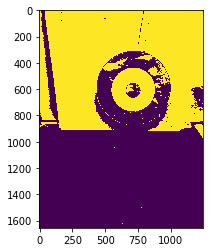

In [657]:
plt.imshow(thresh)